# Estimación de la intensidad 
A partir de los valores reales de la potencia y suponiendo un spot uniforme

Laser 532nm

$d = (1.85 \pm 0.2)mm$, 

$f_o = 150.0mm$ ,$f_e = 25.0mm$

$M = \frac{f_o}{f_e} = 6.0 $

Entonces 

$d_{ef} = 37/120 mm \pm 1/30mm  = 308 \mu m \pm 33.33 \mu m$

$A_{ef} = 0.074 mm^2$


In [1]:
# importamos las librerias
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
import seaborn as sns
import scipy
from scipy.optimize import minimize
from scipy.optimize import curve_fit

# python file for Fuctions to fitting data
#from Fit_functions import *

In [2]:
# for plotting
plt.rcParams.update({
    'font.size': 30,
    "text.usetex": True,
    "font.family": "Helvetica"
    })

In [3]:
# fitting functions
def linear_func(X, A, B): 
    Y = A*X + B
    return Y

# ajuste por mínimos cuadrados
def leastsquares(Tau,X):
    # construyendo la matriz A
    A = np.vstack([Tau, np.ones(len(Tau))]).T
    y = X[:,np.newaxis]
    a, b = np.linalg.lstsq(A, y, rcond=None)[0]
    return a,b

# Estimación potencia real

In [4]:
# extrayendo los datos de potencias
Powers1 = pd.read_csv('measurements/laserpowers1.csv')
Powers2 = pd.read_csv('measurements/laserpowers2.csv')
Powers3 = pd.read_csv('measurements/laserpowers3.csv')

Powersdf = pd.concat([Powers1,Powers2,Powers3],ignore_index=True).copy()

In [5]:
# sorting by power form smallest to largest
Powersdf = Powersdf.sort_values(by=['MP (mW)'],ascending=True,ignore_index=True).copy()
Powersdf

,MP (mW),RP(mW),std,T (°C)
0,6,2.154,0.001,29.0
1,7,3.044,0.001,NaN
2,7,2.960,0.010,38.0
3,7,4.289,0.001,NaN
4,8,3.474,0.001,29.0
5,8,3.450,0.010,38.0
6,8,3.100,0.017,NaN
7,9,3.420,0.017,NaN
8,9,4.570,0.010,38.0
9,10,4.634,0.001,NaN


<Figure size 640x480 with 0 Axes>

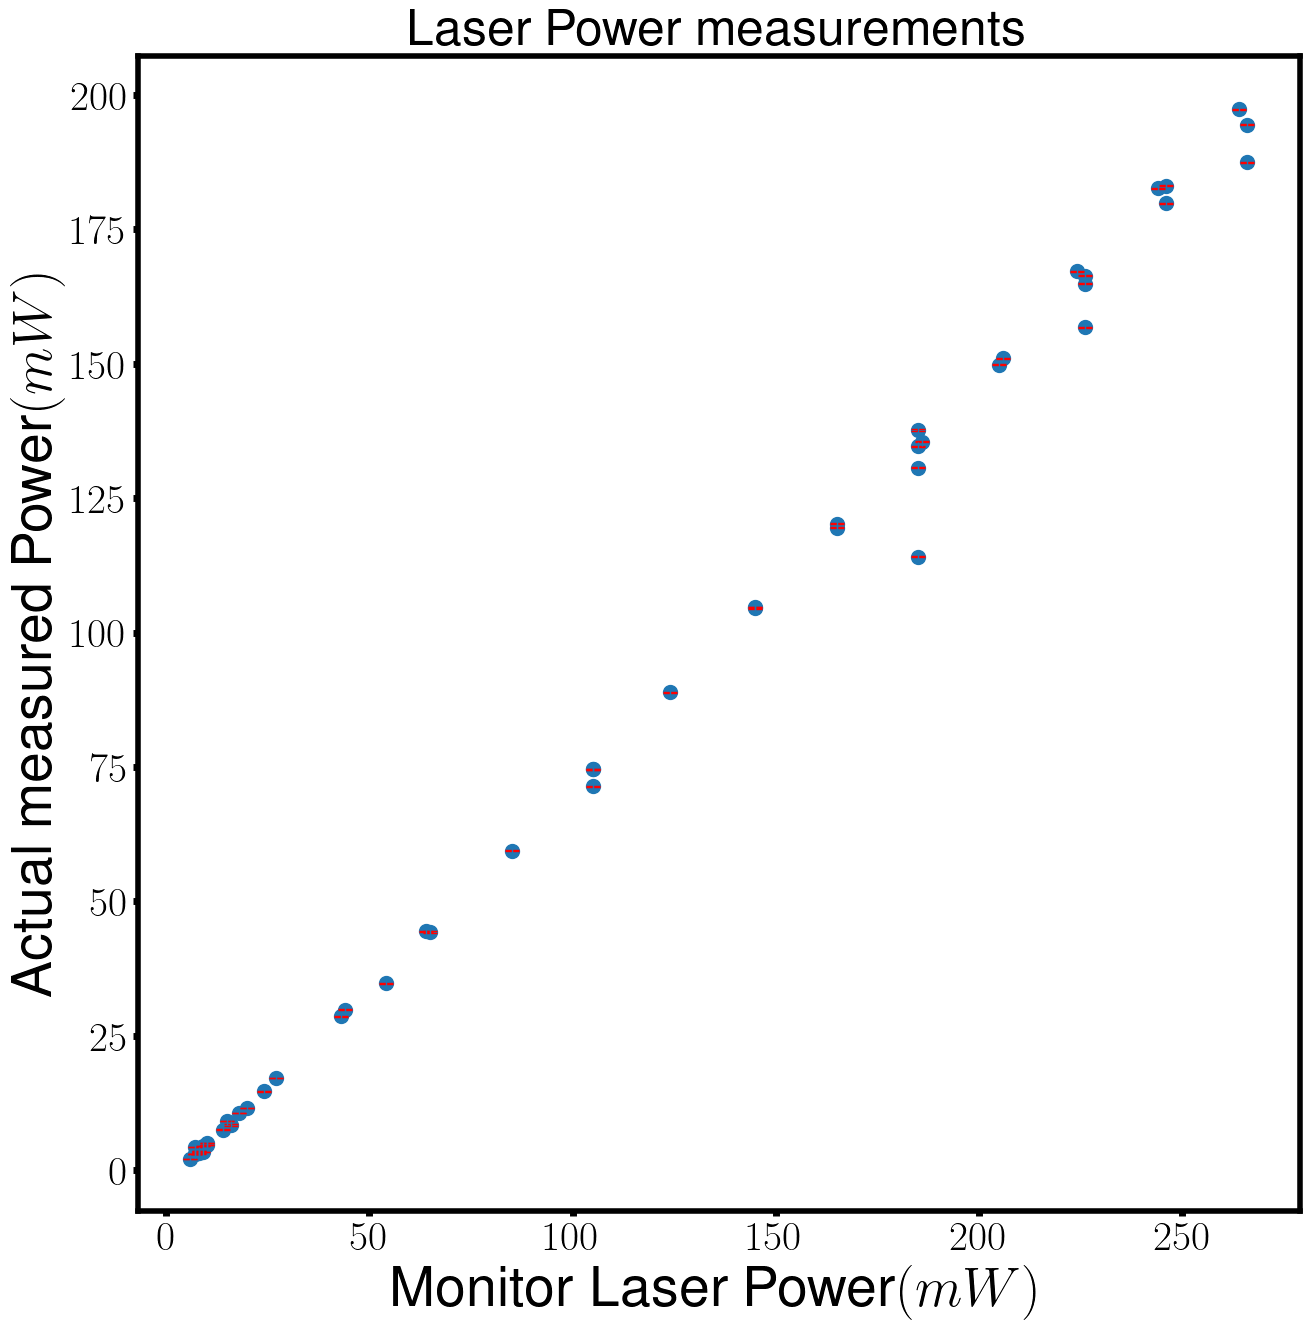

In [6]:
# plotting monitor powers vs real powers

plt.clf()
plt.rcParams.update({'font.size': 30})
fig, (ax1) = plt.subplots(1, figsize=(15, 15)) #you can add ax1, ax2 etc

plt.scatter(Powersdf['MP (mW)'],Powersdf['RP(mW)'],marker = '.', s = 400,alpha=1)#,label=File_names[Iparticle][:13])
plt.errorbar(Powersdf['MP (mW)'], Powersdf['RP(mW)'], yerr=Powersdf['std'],capsize=5,fmt="|",ecolor='red')
#plt.plot(fitX,fitY,'--',color='black',linewidth=2.8)
#plt.plot(fitX,fitY,'--',color='black',linewidth=2.8)
#setting scale
#plt.xscale("log")
#plt.yscale("log")

plt.rc('xtick', labelsize=35) 
plt.rc('ytick', labelsize=35)  
plt.xlabel(r'Monitor Laser Power$ (mW)$', size=40)
plt.ylabel(r'Actual measured Power$ (mW)$', size=40)
plt.title("Laser Power measurements")

#changing the width of axis lines
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(4)

plt.tick_params(width=5)

In [7]:
# fitting data with errobars
parameters, covariance = curve_fit(linear_func, Powersdf['MP (mW)'], Powersdf['RP(mW)'],
                                   sigma=Powersdf['std'], absolute_sigma=True)

SE = np.sqrt(np.diag(covariance))
# Print the results
print("Coefficients: ", parameters)
print("Standard errors: ",SE)

# Elementos para graficar
fitA = parameters[0]
fitB = parameters[1]
fitX = np.linspace(0,280,400)
fitY = linear_func(fitX,fitA,fitB)#,fitv,fitTr) 

Coefficients:  [ 0.72727984 -2.00203052]
Standard errors:  [8.09483357e-05 8.28330578e-04]


<Figure size 640x480 with 0 Axes>

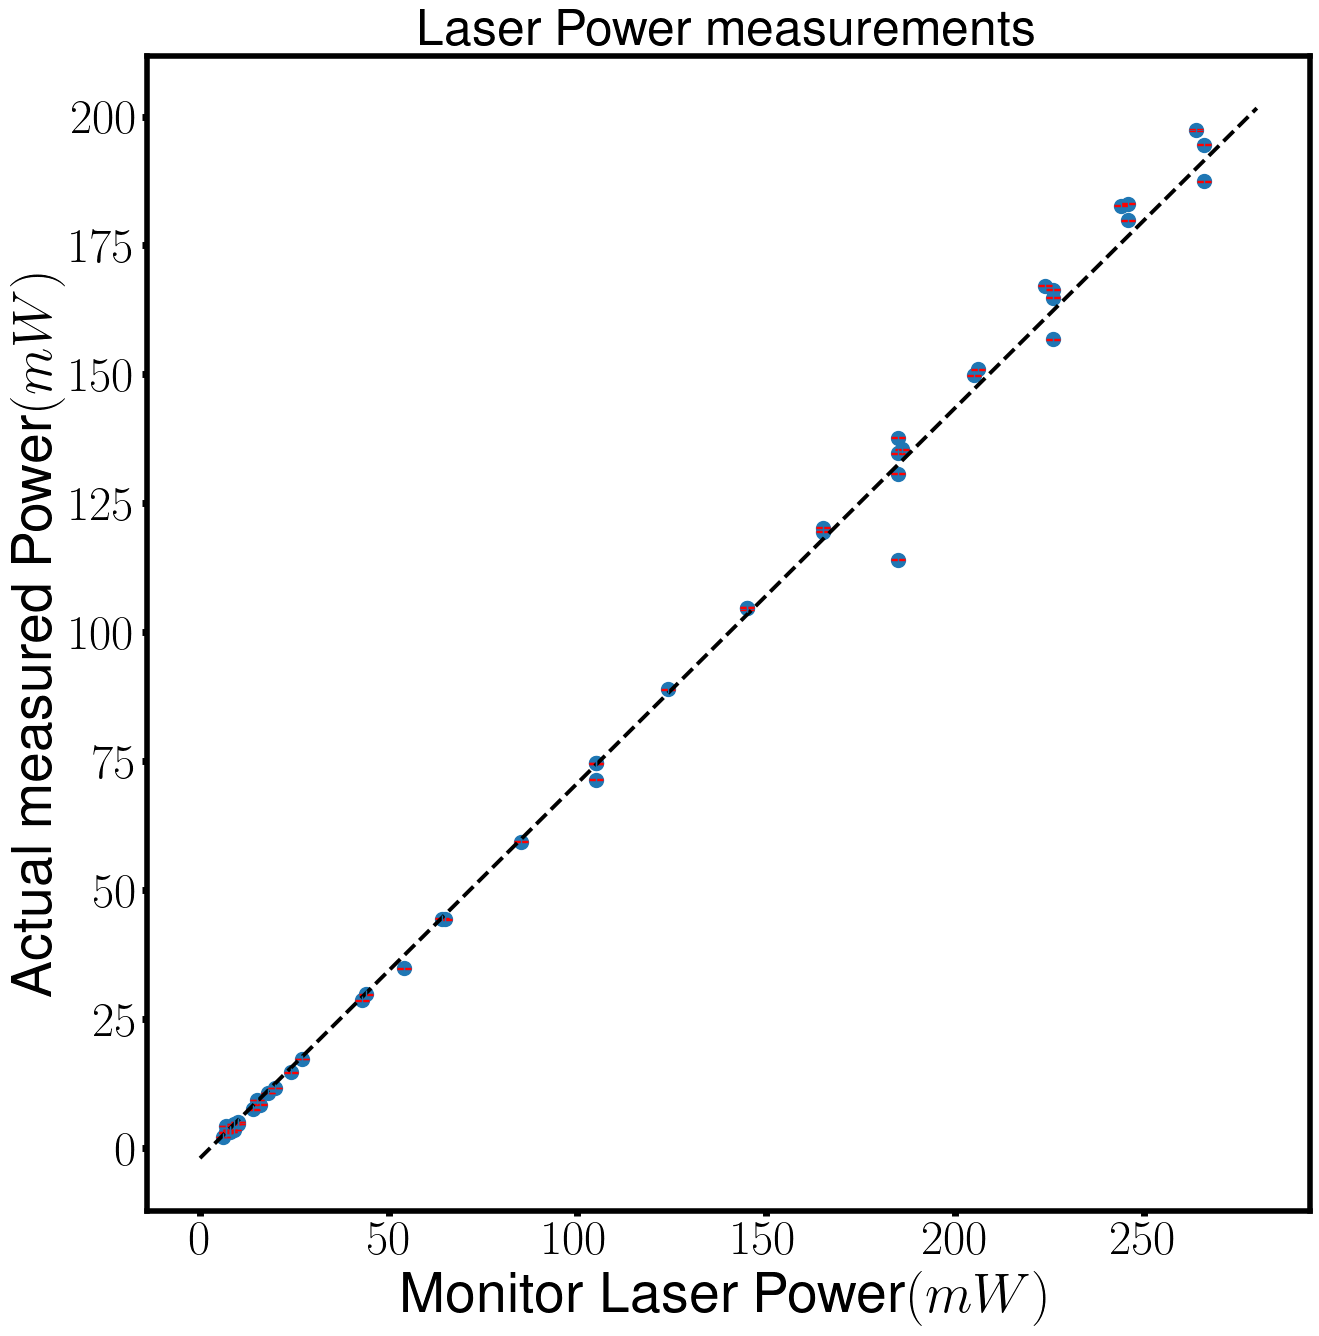

In [8]:
# plotting monitor powers vs real powers

plt.clf()
plt.rcParams.update({'font.size': 30})
fig, (ax1) = plt.subplots(1, figsize=(15, 15)) #you can add ax1, ax2 etc

plt.scatter(Powersdf['MP (mW)'],Powersdf['RP(mW)'],marker = '.', s = 400,alpha=1)#,label=File_names[Iparticle][:13])
plt.errorbar(Powersdf['MP (mW)'], Powersdf['RP(mW)'], yerr=Powersdf['std'],capsize=5,fmt="|",ecolor='red')
plt.plot(fitX,fitY,'--',color='black',linewidth=2.8)

#setting scale
#plt.xscale("log")
#plt.yscale("log")

plt.rc('xtick', labelsize=35) 
plt.rc('ytick', labelsize=35)  
plt.xlabel(r'Monitor Laser Power$ (mW)$', size=40)
plt.ylabel(r'Actual measured Power$ (mW)$', size=40)
plt.title("Laser Power measurements")

#changing the width of axis lines
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(4)

plt.tick_params(width=5)

$$Intesity = \frac{aPower}{A_{eff}}$$

In [9]:
def Real_power(Power):
    A = 0.727279836706763
    B = -2.0020305219665233
    ErA = 8.094833565833314e-05
    ErB = 0.0008283305781254659
    RP = A*Power + B
    error = np.sqrt((ErA**2)*(Power**2)+ErB**2)
    return RP,error

In [10]:
# translation to Intensity
def get_intensity(Power,erpower):
    d_laser = 1850.00
    reduction = 6.0
    er_laser = 200.0
    A_eff = np.pi*((d_laser/reduction)/2.0)**2
    errA = (2*(er_laser/d_laser))*A_eff 
    Intensity = Power/A_eff
    error = np.sqrt((((errA**2)/A_eff**2)+((erpower**2)/Power**2))*Intensity**2)
    return Intensity,error

In [11]:
def final_intesity(Power):
    P, Perr = Real_power(Power)
    return get_intensity(P, Perr)

In [12]:
P, Perr = Real_power(265)
print('Real power (mW): ', P,'+-', Perr)
Intesity, Ierr = final_intesity(265)
print('Intensity (mW/um^2): ', Intesity,'+-', Ierr)

Real power (mW):  190.72712620532567 +- 0.021467295758706234
Intensity (mW/um^2):  0.0025543571939165323 +- 0.0005522935221662928


In [122]:
Powersdf['intensity'] = final_intesity(Powersdf['MP (mW)'])[0]*1000
Powersdf['errint'] = final_intesity(Powersdf['MP (mW)'])[1]*1000

In [123]:
Real_power(265)

(190.72712620532567, 0.021467295758706234)

In [124]:
Powersdf

,MP (mW),RP(mW),std,T (°C),intensity,errint,Nintensity,Nerrint
0,6,2.154,0.001,29.0,0.031629,0.006839,0.000048,0.000010
1,7,3.044,0.001,NaN,0.041369,0.008945,0.000062,0.000013
2,7,2.960,0.010,38.0,0.041369,0.008945,0.000062,0.000013
3,7,4.289,0.001,NaN,0.041369,0.008945,0.000062,0.000013
4,8,3.474,0.001,29.0,0.051109,0.011051,0.000077,0.000017
5,8,3.450,0.010,38.0,0.051109,0.011051,0.000077,0.000017
6,8,3.100,0.017,NaN,0.051109,0.011051,0.000077,0.000017
7,9,3.420,0.017,NaN,0.060850,0.013157,0.000092,0.000020
8,9,4.570,0.010,38.0,0.060850,0.013157,0.000092,0.000020
9,10,4.634,0.001,NaN,0.070590,0.015263,0.000106,0.000023


# Estimación de la intensidad a partir del análisis del perfil gaussiano

Suponiendo que el haz láser tiene un perfil gaussiano, este queda determinado a partir de su media $\mu$ y su desviación estándar $\sigma$

Si el haz laser de $532nm$ con una cintura $d = (1.85 \pm 0.2)mm$, pasa por un telescopio con $f_o = 150.0mm$ ,$f_e = 25.0mm$ y consecuentemente $M = \frac{f_o}{f_e} = 6.0 $.

Entonces 

$d_{ef} = 37/120 mm \pm 1/30mm  = 308 \mu m \pm 33.33 \mu m$

Tenemos una distribución con
$\sigma = 37/240 mm$ y $\mu = 0 mm$

In [130]:
from numpy.random import normal 

In [131]:
mu, sigma = 0,(37/480)
distribution = normal(mu, sigma, 50000)
x_dist = np.linspace(-1,1,500)
Teo_dist = (1/(np.sqrt(2*np.pi)*sigma))*np.exp((-(1/2)*(x_dist/sigma)**2))

<Figure size 640x480 with 0 Axes>

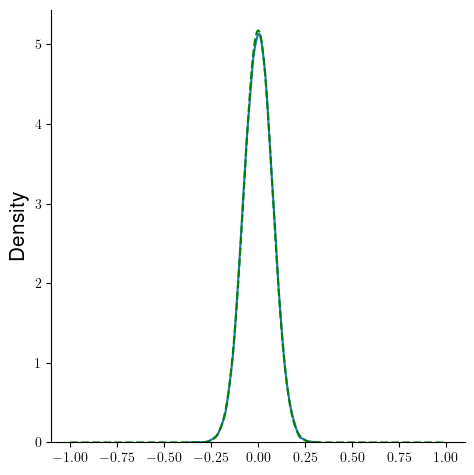

In [133]:
plt.clf()
plt.rcParams.update({'font.size': 15})
sns.displot(data = distribution,kind = 'kde')
plt.plot(x_dist,Teo_dist,'--', color = 'green')

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)  

De acuerdo con el tamaño de la región en la que el sensor visualiza la partícula, 
$$L = 720pix \cdot 0.15384\times10^{-6}(\frac{m}{pix}) = 0.1107648 mm$$

In [78]:
L = 720*0.15384e-3
l = np.sqrt(2)*L/2
l

0.0783225411967717

<Figure size 640x480 with 0 Axes>

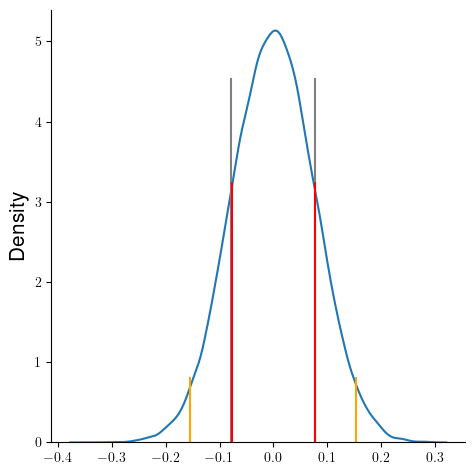

In [134]:
plt.clf()
plt.rcParams.update({'font.size': 15})
sns.displot(data = distribution,kind = 'kde')
#plt.plot(x_dist,Teo_dist,'--')
plt.axvline(x=l,ymin=0,ymax=0.84,c='gray')
plt.axvline(x=-l,ymin=0,ymax=0.84,c='gray')

plt.axvline(x=sigma,ymin=0,ymax=0.6,c='red')
plt.axvline(x=-sigma,ymin=0,ymax=0.6,c='red')

plt.axvline(x=2*sigma,ymin=0,ymax=0.15,c='orange')
plt.axvline(x=-2*sigma,ymin=0,ymax=0.15,c='orange')

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)  

In [135]:
# estimando el porcentaje de potencia en la región de visualización
from scipy.stats import norm
densigma = norm.cdf(sigma, 0, sigma) - norm.cdf(-sigma, 0, sigma)
den2sigma = norm.cdf(2*sigma, 0, sigma) - norm.cdf(-2*sigma, 0, sigma)
desL = norm.cdf(l, 0, sigma) - norm.cdf(-l, 0, sigma)

densityDf = pd.DataFrame({'position':['sigma','2sigma','l'],'Value':[sigma,2*sigma,l],'power fraction(%)': [densigma*100,den2sigma*100,desL*100]})


In [136]:
densityDf

,position,Value,power fraction(%)
0,sigma,0.077083,68.268949
1,2sigma,0.154167,95.449974
2,l,0.078323,69.040690


**Por lo tanto la potencia en la región de visualización es aproximadamente 38.85% de la potencia real**

In [155]:
# translation to Intensity
def Nget_intensity(Power,erpower,densL):
    RPower = densL*Power
    d_laser = 1850.00
    L = 720*0.15384
    r = np.sqrt(2)*L/2
    er_laser = 200.0
    A_eff = (L)**2 #np.pi*(r**2)
    errA = (2*(er_laser/d_laser))*A_eff 
    Intensity = RPower/A_eff
    error = np.sqrt((((errA**2)/A_eff**2)+((erpower**2)/Power**2))*Intensity**2)
    return Intensity,error

In [156]:
L = 720*0.15384
r = np.sqrt(2)*L/2
r

78.32254119677171

In [157]:
def Nfinal_intesity(Power,desL):
    P, Perr = Real_power(Power)
    return Nget_intensity(P, Perr, desL)

In [158]:
P, Perr = Real_power(265)
print('Real power (mW): ', P,'+-', Perr)
Intesity, Ierr = final_intesity(265)
print('Intensity (mW/um^2): ', Intesity,'+-', Ierr)

Real power (mW):  190.72712620532567 +- 0.021467295758706234
Intensity (mW/um^2):  0.0025543571939165323 +- 0.0005522935221662928


In [159]:
P, Perr = Real_power(265)
print('Real power (mW): ', P,'+-', Perr)
Intesity, Ierr = Nfinal_intesity(265,desL)
print('Intensity (mW/um^2): ', Intesity,'+-', Ierr)

Real power (mW):  190.72712620532567 +- 0.021467295758706234
Intensity (mW/um^2):  0.010732825165368236 +- 0.0023206111609972205


In [160]:
Powersdf['Nintensity'] = Nfinal_intesity(Powersdf['MP (mW)'],desL)[0]*1000
Powersdf['Nerrint'] = Nfinal_intesity(Powersdf['MP (mW)'],desL)[1]*1000

In [161]:
Powersdf

,MP (mW),RP(mW),std,T (°C),intensity,errint,Nintensity,Nerrint
0,6,2.154,0.001,29.0,0.031629,0.006839,0.132898,0.028735
1,7,3.044,0.001,NaN,0.041369,0.008945,0.173824,0.037584
2,7,2.960,0.010,38.0,0.041369,0.008945,0.173824,0.037584
3,7,4.289,0.001,NaN,0.041369,0.008945,0.173824,0.037584
4,8,3.474,0.001,29.0,0.051109,0.011051,0.214750,0.046433
5,8,3.450,0.010,38.0,0.051109,0.011051,0.214750,0.046433
6,8,3.100,0.017,NaN,0.051109,0.011051,0.214750,0.046433
7,9,3.420,0.017,NaN,0.060850,0.013157,0.255677,0.055281
8,9,4.570,0.010,38.0,0.060850,0.013157,0.255677,0.055281
9,10,4.634,0.001,NaN,0.070590,0.015263,0.296603,0.064130


In [162]:
# fitting data with errobars
parameters, covariance = curve_fit(linear_func, Powersdf['intensity'],Powersdf['Nintensity'])
SE = np.sqrt(np.diag(covariance))
# Print the results
print("Coefficients: ", parameters)
print("Standard errors: ",SE)

# Elementos para graficar
fitA1 = parameters[0]
fitB1 = parameters[1]
fitX1 = np.linspace(0.0,2.6,500)
fitY1 = linear_func(fitX1,fitA1,fitB1)#,fitv,fitTr) 

Coefficients:  [4.20177146e+00 4.93334170e-09]
Standard errors:  [3.85790247e-10 1.19412144e-10]


<Figure size 640x480 with 0 Axes>

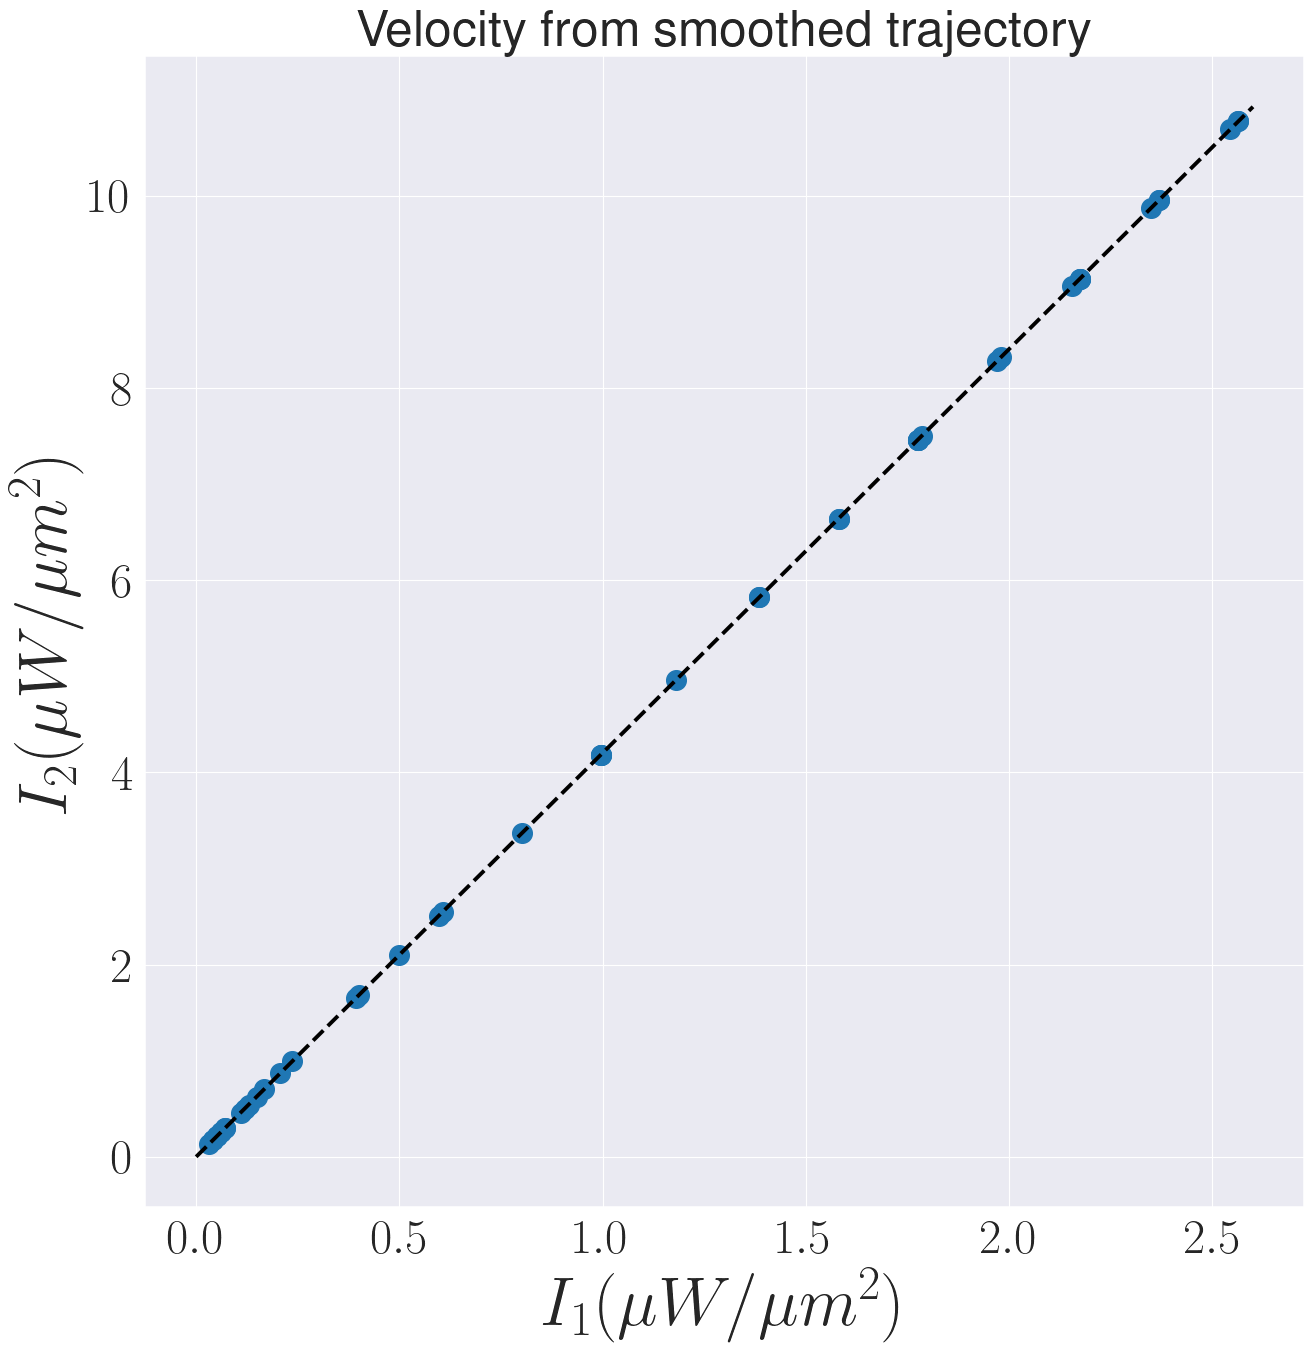

In [163]:
plt.clf()
plt.rcParams.update({'font.size': 30})
with sns.axes_style("darkgrid"):
    fig, (ax1) = plt.subplots(1, figsize=(15, 15)) #you can add ax1, ax2 etc
    plt.scatter(Powersdf['intensity'],Powersdf['Nintensity'],marker = '.', s = 800,alpha=1)
    plt.plot(fitX1,fitY1,'--',color='black',linewidth=2.8)
    
    #plt.errorbar(VelRes['V_ins'], VelRes['V_fit'], yerr=VelRes['DV'],capsize=5,fmt="|",ecolor='red')
    #plt.plot(VelRes['P(mW)'],VelRes['DV'],'--',linewidth=2.8)

    #setting scale
    #plt.xscale("log")
    #plt.yscale("log")

    plt.rc('xtick', labelsize=35) 
    plt.rc('ytick', labelsize=35)  
    plt.xlabel(r'$I_1 (\mu W/\mu m^2)$', size=50)
    plt.ylabel(r'$I_2 (\mu W/\mu m^2)$', size=50)
    plt.title("Velocity from smoothed trajectory")

    #changing the width of axis lines
    for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(4)

    plt.tick_params(width=5)